In [1]:
import montecarlo
import random

In [2]:
ham = montecarlo.Hamiltonian()
ham.initialize(-2,1.1,True)

In [3]:
spins = montecarlo.SpinConfiguration()
spins.initialize([1,1,0,1,0,0,0,1])
random.seed(2)

print("before sweep",spins)
print("E before sweep", ham.compute_energy(spins))

print('#######')

b = ham.metropolis_sweep(spins,1)

print('#######')

print("after sweep",b)
print("E after sweep",ham.compute_energy(b))

before sweep 1, 1, 0, 1, 0, 0, 0, 1.
E before sweep 0.0
#######
#######
after sweep 0, 1, 0, 1, 0, 1, 0, 1.
E after sweep -16.0


In [43]:
random.seed(2)
montecarlo.montecarlo_metropolis(30,ham,10,1000,100)

(-13.83, -2.18, 1.1698934000000034, 1.8191599999999997)

In [5]:
import matplotlib.pyplot as plt

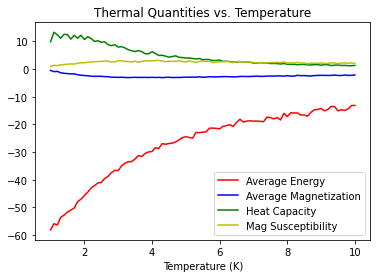

In [13]:
import montecarlo
import matplotlib.pyplot as plt

ham = montecarlo.Hamiltonian()
ham.initialize(-2,1.1,True)

temps, energies, magnetizations, heat_caps, mag_susceptibilities = montecarlo.generate_montecarlo_thermal_quantities(30,ham)
    
plt.plot(temps,energies,'-r',temps,magnetizations,'-b',temps,heat_caps,'-g',temps,mag_susceptibilities,'-y')
plt.legend(["Average Energy", "Average Magnetization", "Heat Capacity", "Mag Susceptibility"],loc='best')
plt.xlabel("Temperature (K)")
plt.title("Thermal Quantities vs. Temperature")
plt.savefig("montecarlo_1000_100.png")

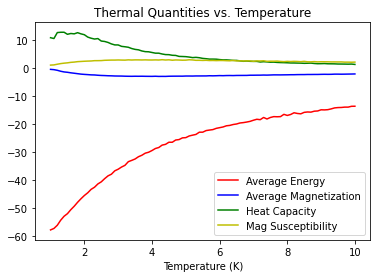

In [14]:
import montecarlo
import matplotlib.pyplot as plt

ham = montecarlo.Hamiltonian()
ham.initialize(-2,1.1,True)

temps, energies, magnetizations, heat_caps, mag_susceptibilities = montecarlo.generate_montecarlo_thermal_quantities(30,ham,1,10,0.1,10000,1000)
    
plt.plot(temps,energies,'-r',temps,magnetizations,'-b',temps,heat_caps,'-g',temps,mag_susceptibilities,'-y')
plt.legend(["Average Energy", "Average Magnetization", "Heat Capacity", "Mag Susceptibility"],loc='best')
plt.xlabel("Temperature (K)")
plt.title("Thermal Quantities vs. Temperature")
plt.savefig("montecarlo_10000_1000.png")

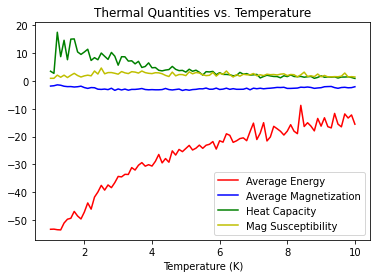

In [12]:
import montecarlo
import matplotlib.pyplot as plt

ham = montecarlo.Hamiltonian()
ham.initialize(-2,1.1,True)

temps, energies, magnetizations, heat_caps, mag_susceptibilities = montecarlo.generate_montecarlo_thermal_quantities(30,ham,1,10,0.1,100,10)
    
plt.plot(temps,energies,'-r',temps,magnetizations,'-b',temps,heat_caps,'-g',temps,mag_susceptibilities,'-y')
plt.legend(["Average Energy", "Average Magnetization", "Heat Capacity", "Mag Susceptibility"],loc='best')
plt.xlabel("Temperature (K)")
plt.title("Thermal Quantities vs. Temperature")
plt.savefig("montecarlo_100_10.png")

In [ ]:
temps = []
j = 0.1
while j <= 10:
    temps.append(j)
    j += 0.1
    
eng = []
mag = []
cap = []
sust = []

ham2 = montecarlo.Hamiltonian()
ham.initialize(-1,.1,True)
print('start')
for i in range(len(temps)):
    a, b, c, d = montecarlo.montecarlo_metropolis(8,ham,temps[i],10000,1000)
    eng.append(a)
    mag.append(b)
    cap.append(c)
    sust.append(d)
    
plt.plot(temps,eng,'-r',temps,mag,'-b',temps,cap,'-g',temps,sust,'-y')

Text(0.5, 1.0, 'Thermal Quantities vs. Temperature')

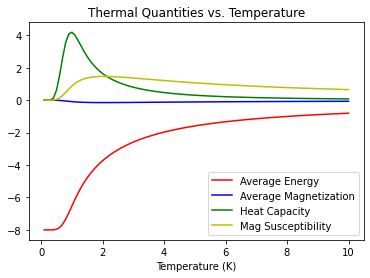

In [15]:
import montecarlo

import matplotlib.pyplot as plt

# Create spin configuration system with N = 8 spins
spin_system = montecarlo.SpinConfigurationSystem()
spin_system.initialize(8)

# Create Hamiltonian
ham = montecarlo.Hamiltonian()
ham.initialize(-1,.1,True)

# Generate lists to be graphed
temperatures, energies, magnetizations, heat_caps, mag_suscept = ham.generate_thermal_quantities(spin_system,0.1,10,0.1)

# Creates plot
plt.plot(
 temperatures, energies, 'r-',
 temperatures, magnetizations, 'b-',
 temperatures, heat_caps, 'g-',
 temperatures, mag_suscept, 'y-'
)
plt.legend(["Average Energy", "Average Magnetization", "Heat Capacity", "Mag Susceptibility"],loc='best')
plt.xlabel("Temperature (K)")
plt.title("Thermal Quantities vs. Temperature")

In [20]:
import montecarlo

# Create configuration
spins = montecarlo.SpinConfiguration()
spins.initialize([0,1,1,1,0,1])

# Create hamiltonian with desired values of mu, J and the periodic boundary conditions flag
ham = montecarlo.Hamiltonian()
ham.initialize(-2,1.1,True)

# Compute energy
energy = ham.compute_energy(spins)

print("Spin configuration:", spins)
print("Energy:", round(energy,1))

Spin configuration: 0, 1, 1, 1, 0, 1.
Energy: -1.8


In [21]:
import montecarlo
import random

# Create spin configuration object
spins = montecarlo.SpinConfiguration()

# Generate a random spin configuration based on seed value 2
random.seed(2)
spins.randomize(8)

# Get number of sites
num_sites = spins.n_sites()

# Prints output
print("Spin configuration:", spins)
print("Number of sites in configuration:", num_sites)

Spin configuration: 0, 0, 0, 1, 0, 1, 1, 0.
Number of sites in configuration: 8


In [10]:
import montecarlo

# Create spin configuration system

spin_system = montecarlo.SpinConfigurationSystem()
spin_system.initialize(8)

# Create Hamlitonian
ham = montecarlo.Hamiltonian()
ham.initialize(-2,1.1,True)

# Calculate thermal quantities
temperature = 10
avg_energy = ham.compute_average_energy(temperature, spin_system)
avg_magnetization = ham.compute_average_mag(temperature, spin_system)
heat_capacity = ham.compute_heat_capacity(temperature, spin_system)
mag_susceptibility = ham.compute_mag_susceptibility(temperature, spin_system)

# Prints output
print("Average Energy:", round(avg_energy,1))
print("Average Magnetization:", round(avg_magnetization,1))
print("Heat Capacity:", round(heat_capacity,1))
print("Magnetic Susceptibility:", round(mag_susceptibility,1))

Average Energy: -3.7
Average Magnetization: -0.6
Heat Capacity: 0.3
Magnetic Susceptibility: 0.5


Text(0.5, 1.0, 'Thermal Quantities vs. Temperature')

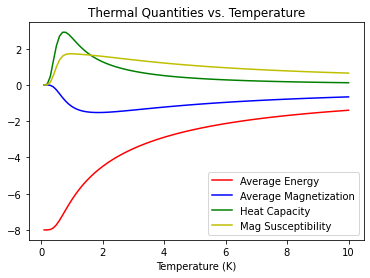

In [7]:
import montecarlo
import matplotlib.pyplot as plt

# Create spin configuration system with N = 8 spins
spin_system = montecarlo.SpinConfigurationSystem()
spin_system.initialize(8)

# Create Hamiltonian
ham = montecarlo.Hamiltonian()
ham.initialize(-1,1.01,True)

# Generate lists to be graphed
temperatures, energies, magnetizations, heat_caps, mag_suscept = ham.generate_thermal_quantities(spin_system,0.1,10,0.1)

# Creates plot
plt.plot(
 temperatures, energies, 'r-',
 temperatures, magnetizations, 'b-',
 temperatures, heat_caps, 'g-',
 temperatures, mag_suscept, 'y-'
)
plt.legend(["Average Energy", "Average Magnetization", "Heat Capacity", "Mag Susceptibility"],loc='best')
plt.xlabel("Temperature (K)")
plt.title("Thermal Quantities vs. Temperature")

In [35]:
import montecarlo
import random

# Create spin configuration
spins = montecarlo.SpinConfiguration()

# Create Hamiltonian with high negative mu value (strong external field)
ham = montecarlo.Hamiltonian()
ham.initialize(-1,-10,True)

# Creates 30 site spin configuration from seed value 2.
random.seed(2)
spins.randomize(30)
print("Spin configuration before sweep:", spins)

# Performs sweep
spins = ham.metropolis_sweep(spins,10)
print("Spin configuration after sweep:", spins)

Spin configuration before sweep: 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0.
Spin configuration after sweep: 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1.


In [44]:
import montecarlo
import random

ham = montecarlo.Hamiltonian()
ham.initialize(-2,1.1,True)

random.seed(2)
energy, magnetization, heat_capacity, mag_susceptibility = montecarlo.montecarlo_metropolis(30,ham,10,1000,100)

print("Average Energy:", round(energy,1))
print("Average Magnetization:", round(magnetization,1))
print("Heat Capacity:", round(heat_capacity,1))
print("Magnetic Susceptibility:", round(mag_susceptibility,1))

Average Energy: -13.8
Average Magnetization: -2.2
Heat Capacity: 1.2
Magnetic Susceptibility: 1.8
